In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('ProcessedRED1.csv')
df

,Unnamed: 0,City,Price,Bedroom,Bathroom,Floors,Parking,Face,Area,Road_Width,Road_Type,Build_Area,Amenities
0,8,Kathmandu,32500000,6,4,2,1,South East,1369,12.00,Concrete,819346,13
1,9,Pokhara,32000000,4,5,3,3,South West,4791,15.00,Blacktopped,2395,3
2,10,Kathmandu,39900000,5,4,3,1,North West,1540,14.00,Paved,855625,3
3,11,Kathmandu,15000000,2,2,1,1,South,1711,12.00,Gravelled,0,3
4,12,Kathmandu,52500000,5,5,3,3,South East,2738,20.00,Blacktopped,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1526,2089,Kathmandu,11000000,3,2,6,1,North West,1336,20.00,None,0,8
1527,2090,Kathmandu,2500000,1,0,1,0,North,1582,26.25,None,0,3
1528,2091,Kathmandu,32500000,1,0,5,0,East,1026,25.00,None,0,10
1529,2097,Kathmandu,12000000,4,2,2,1,North East,855,13.00,None,0,4


In [3]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df

,City,Price,Bedroom,Bathroom,Floors,Parking,Face,Area,Road_Width,Road_Type,Build_Area,Amenities
0,Kathmandu,32500000,6,4,2,1,South East,1369,12.00,Concrete,819346,13
1,Pokhara,32000000,4,5,3,3,South West,4791,15.00,Blacktopped,2395,3
2,Kathmandu,39900000,5,4,3,1,North West,1540,14.00,Paved,855625,3
3,Kathmandu,15000000,2,2,1,1,South,1711,12.00,Gravelled,0,3
4,Kathmandu,52500000,5,5,3,3,South East,2738,20.00,Blacktopped,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...
1526,Kathmandu,11000000,3,2,6,1,North West,1336,20.00,None,0,8
1527,Kathmandu,2500000,1,0,1,0,North,1582,26.25,None,0,3
1528,Kathmandu,32500000,1,0,5,0,East,1026,25.00,None,0,10
1529,Kathmandu,12000000,4,2,2,1,North East,855,13.00,None,0,4


In [4]:
df = df[['City', 'Bedroom', 'Bathroom', 'Floors', 'Parking', 'Face', 'Area', 'Road_Width', 'Road_Type', 'Build_Area', 'Amenities', 'Price']]
df

,City,Bedroom,Bathroom,Floors,Parking,Face,Area,Road_Width,Road_Type,Build_Area,Amenities,Price
0,Kathmandu,6,4,2,1,South East,1369,12.00,Concrete,819346,13,32500000
1,Pokhara,4,5,3,3,South West,4791,15.00,Blacktopped,2395,3,32000000
2,Kathmandu,5,4,3,1,North West,1540,14.00,Paved,855625,3,39900000
3,Kathmandu,2,2,1,1,South,1711,12.00,Gravelled,0,3,15000000
4,Kathmandu,5,5,3,3,South East,2738,20.00,Blacktopped,0,9,52500000
...,...,...,...,...,...,...,...,...,...,...,...,...
1526,Kathmandu,3,2,6,1,North West,1336,20.00,None,0,8,11000000
1527,Kathmandu,1,0,1,0,North,1582,26.25,None,0,3,2500000
1528,Kathmandu,1,0,5,0,East,1026,25.00,None,0,10,32500000
1529,Kathmandu,4,2,2,1,North East,855,13.00,None,0,4,12000000


In [5]:
# df['Road_Type'] = df.Road_Type.map({'Alley':0, 'Blacktopped':1, 'Concrete':2, 'Gravelled':3, 'Paved':4, 'Soil Stabilized':5, 'None':6})
# df['City'] = df.City.map({'Bhaktapur':0, 'Chitwan':1, 'Kathmandu':2, 'Lalitpur':3, 'Pokhara':4, 'Others':5})
# df['Face'] = df.Face.map({'East':0, 'North':1, 'North East':2, 'North West':3, 'South':4, 'South East':5, 'South West':6, 'West':7})

In [6]:
dummies = pd.get_dummies(df.Face)
dummies.head(3)

,East,North,North East,North West,South,South East,South West,West
0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0
2,0,0,0,1,0,0,0,0


In [7]:
df = pd.concat([df,dummies],axis='columns')
df.head()

,City,Bedroom,Bathroom,Floors,Parking,Face,Area,Road_Width,Road_Type,Build_Area,Amenities,Price,East,North,North East,North West,South,South East,South West,West
0,Kathmandu,6,4,2,1,South East,1369,12.0,Concrete,819346,13,32500000,0,0,0,0,0,1,0,0
1,Pokhara,4,5,3,3,South West,4791,15.0,Blacktopped,2395,3,32000000,0,0,0,0,0,0,1,0
2,Kathmandu,5,4,3,1,North West,1540,14.0,Paved,855625,3,39900000,0,0,0,1,0,0,0,0
3,Kathmandu,2,2,1,1,South,1711,12.0,Gravelled,0,3,15000000,0,0,0,0,1,0,0,0
4,Kathmandu,5,5,3,3,South East,2738,20.0,Blacktopped,0,9,52500000,0,0,0,0,0,1,0,0


In [8]:
df = df.drop('Face',axis='columns')
df.head()

,City,Bedroom,Bathroom,Floors,Parking,Area,Road_Width,Road_Type,Build_Area,Amenities,Price,East,North,North East,North West,South,South East,South West,West
0,Kathmandu,6,4,2,1,1369,12.0,Concrete,819346,13,32500000,0,0,0,0,0,1,0,0
1,Pokhara,4,5,3,3,4791,15.0,Blacktopped,2395,3,32000000,0,0,0,0,0,0,1,0
2,Kathmandu,5,4,3,1,1540,14.0,Paved,855625,3,39900000,0,0,0,1,0,0,0,0
3,Kathmandu,2,2,1,1,1711,12.0,Gravelled,0,3,15000000,0,0,0,0,1,0,0,0
4,Kathmandu,5,5,3,3,2738,20.0,Blacktopped,0,9,52500000,0,0,0,0,0,1,0,0


In [9]:
dummies = pd.get_dummies(df.Road_Type)
dummies.head(3)

,Alley,Blacktopped,Concrete,Gravelled,None,Paved,Soil Stabilized
0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0
2,0,0,0,0,0,1,0


In [10]:
df = pd.concat([df,dummies],axis='columns')
df.head()

,City,Bedroom,Bathroom,Floors,Parking,Area,Road_Width,Road_Type,Build_Area,Amenities,...,South East,South West,West,Alley,Blacktopped,Concrete,Gravelled,None,Paved,Soil Stabilized
0,Kathmandu,6,4,2,1,1369,12.0,Concrete,819346,13,...,1,0,0,0,0,1,0,0,0,0
1,Pokhara,4,5,3,3,4791,15.0,Blacktopped,2395,3,...,0,1,0,0,1,0,0,0,0,0
2,Kathmandu,5,4,3,1,1540,14.0,Paved,855625,3,...,0,0,0,0,0,0,0,0,1,0
3,Kathmandu,2,2,1,1,1711,12.0,Gravelled,0,3,...,0,0,0,0,0,0,1,0,0,0
4,Kathmandu,5,5,3,3,2738,20.0,Blacktopped,0,9,...,1,0,0,0,1,0,0,0,0,0


In [11]:
df = df.drop('Road_Type',axis='columns')
df.head()

,City,Bedroom,Bathroom,Floors,Parking,Area,Road_Width,Build_Area,Amenities,Price,...,South East,South West,West,Alley,Blacktopped,Concrete,Gravelled,None,Paved,Soil Stabilized
0,Kathmandu,6,4,2,1,1369,12.0,819346,13,32500000,...,1,0,0,0,0,1,0,0,0,0
1,Pokhara,4,5,3,3,4791,15.0,2395,3,32000000,...,0,1,0,0,1,0,0,0,0,0
2,Kathmandu,5,4,3,1,1540,14.0,855625,3,39900000,...,0,0,0,0,0,0,0,0,1,0
3,Kathmandu,2,2,1,1,1711,12.0,0,3,15000000,...,0,0,0,0,0,0,1,0,0,0
4,Kathmandu,5,5,3,3,2738,20.0,0,9,52500000,...,1,0,0,0,1,0,0,0,0,0


In [12]:
dummies = pd.get_dummies(df.City)
dummies.head(3)

,Bhaktapur,Chitwan,Kathmandu,Lalitpur,Others,Pokhara
0,0,0,1,0,0,0
1,0,0,0,0,0,1
2,0,0,1,0,0,0


In [13]:
df = pd.concat([df,dummies.drop('Others',axis='columns')],axis='columns')
df.head()

,City,Bedroom,Bathroom,Floors,Parking,Area,Road_Width,Build_Area,Amenities,Price,...,Concrete,Gravelled,None,Paved,Soil Stabilized,Bhaktapur,Chitwan,Kathmandu,Lalitpur,Pokhara
0,Kathmandu,6,4,2,1,1369,12.0,819346,13,32500000,...,1,0,0,0,0,0,0,1,0,0
1,Pokhara,4,5,3,3,4791,15.0,2395,3,32000000,...,0,0,0,0,0,0,0,0,0,1
2,Kathmandu,5,4,3,1,1540,14.0,855625,3,39900000,...,0,0,0,1,0,0,0,1,0,0
3,Kathmandu,2,2,1,1,1711,12.0,0,3,15000000,...,0,1,0,0,0,0,0,1,0,0
4,Kathmandu,5,5,3,3,2738,20.0,0,9,52500000,...,0,0,0,0,0,0,0,1,0,0


In [14]:
df = df.drop(['City'],axis='columns')
df.head(3)

,Bedroom,Bathroom,Floors,Parking,Area,Road_Width,Build_Area,Amenities,Price,East,...,Concrete,Gravelled,None,Paved,Soil Stabilized,Bhaktapur,Chitwan,Kathmandu,Lalitpur,Pokhara
0,6,4,2,1,1369,12.0,819346,13,32500000,0,...,1,0,0,0,0,0,0,1,0,0
1,4,5,3,3,4791,15.0,2395,3,32000000,0,...,0,0,0,0,0,0,0,0,0,1
2,5,4,3,1,1540,14.0,855625,3,39900000,0,...,0,0,0,1,0,0,0,1,0,0


In [15]:
df = df.reindex(columns = [col for col in df.columns if col != 'Price'] + ['Price'])
df

,Bedroom,Bathroom,Floors,Parking,Area,Road_Width,Build_Area,Amenities,East,North,...,Gravelled,None,Paved,Soil Stabilized,Bhaktapur,Chitwan,Kathmandu,Lalitpur,Pokhara,Price
0,6,4,2,1,1369,12.00,819346,13,0,0,...,0,0,0,0,0,0,1,0,0,32500000
1,4,5,3,3,4791,15.00,2395,3,0,0,...,0,0,0,0,0,0,0,0,1,32000000
2,5,4,3,1,1540,14.00,855625,3,0,0,...,0,0,1,0,0,0,1,0,0,39900000
3,2,2,1,1,1711,12.00,0,3,0,0,...,1,0,0,0,0,0,1,0,0,15000000
4,5,5,3,3,2738,20.00,0,9,0,0,...,0,0,0,0,0,0,1,0,0,52500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1526,3,2,6,1,1336,20.00,0,8,0,0,...,0,1,0,0,0,0,1,0,0,11000000
1527,1,0,1,0,1582,26.25,0,3,0,1,...,0,1,0,0,0,0,1,0,0,2500000
1528,1,0,5,0,1026,25.00,0,10,1,0,...,0,1,0,0,0,0,1,0,0,32500000
1529,4,2,2,1,855,13.00,0,4,0,0,...,0,1,0,0,0,0,1,0,0,12000000


In [16]:
from sklearn.model_selection import train_test_split
# Split-out validation dataset
array = df.values
X = array[:,0:28]
Y = array[:,28]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
test_size=validation_size, random_state=seed)

In [17]:
X

array([[6., 4., 2., ..., 1., 0., 0.],
       [4., 5., 3., ..., 0., 0., 1.],
       [5., 4., 3., ..., 1., 0., 0.],
       ...,
       [1., 0., 5., ..., 1., 0., 0.],
       [4., 2., 2., ..., 1., 0., 0.],
       [5., 3., 2., ..., 1., 0., 0.]])

In [18]:
Y

array([32500000., 32000000., 39900000., ..., 32500000., 12000000.,
       27000000.])

In [19]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'

In [20]:
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
# Spot-Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

In [21]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -123156569426755.625000 (28089513027272.523438)
LASSO: -123156458164155.500000 (28089422474884.808594)
EN: -123813903548820.328125 (24761538766684.601562)
KNN: -178938114639195.781250 (26455484633412.613281)
CART: -152529906935960.437500 (37967189543282.289062)
SVR: -267913256746053.000000 (35288507865988.351562)


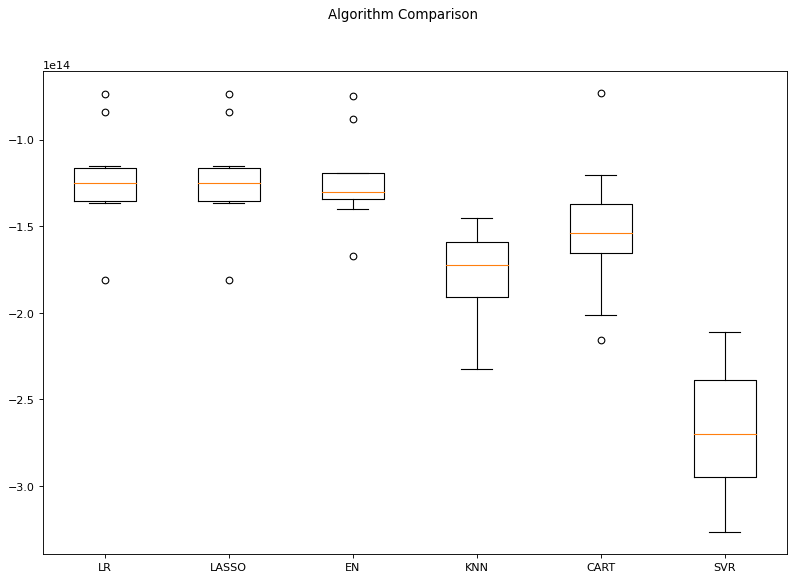

In [22]:
from matplotlib import pyplot
# Compare Algorithms
fig = pyplot.figure(figsize=(12, 8), dpi=80)
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',
LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO',
Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN',
ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',
DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -123103805793615.656250 (28081215120760.492188)
ScaledLASSO: -123156557689533.796875 (28089503041107.046875)
ScaledEN: -123326287953151.406250 (24851550815604.082031)
ScaledKNN: -138138632367943.531250 (31869642051418.339844)
ScaledCART: -147952235776918.125000 (39959247912557.078125)
ScaledSVR: -267912296218216.500000 (35288356874643.351562)


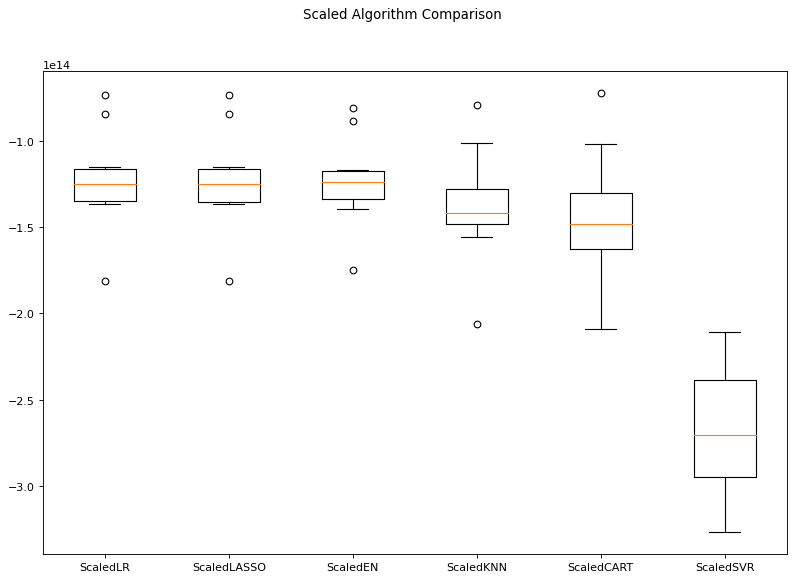

In [24]:
# Compare Algorithms
fig = pyplot.figure(figsize=(12, 8), dpi=80)
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [25]:
from sklearn.model_selection import GridSearchCV
# KNN Algorithm tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = np.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

In [26]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -137556678453709.171875 using {'n_neighbors': 5}
-204042282053578.562500 (40607229344105.585938) with: {'n_neighbors': 1}
-142240530170248.187500 (30711908507653.289062) with: {'n_neighbors': 3}
-137556678453709.171875 (31612679652477.359375) with: {'n_neighbors': 5}
-138026782968050.718750 (29838033392743.179688) with: {'n_neighbors': 7}
-139343363326642.500000 (28295612798276.335938) with: {'n_neighbors': 9}
-141004829251067.906250 (29252644026273.921875) with: {'n_neighbors': 11}
-141288372755536.593750 (29907111434796.601562) with: {'n_neighbors': 13}
-140362096866567.156250 (29014179698082.691406) with: {'n_neighbors': 15}
-140584359551507.203125 (28958473458169.492188) with: {'n_neighbors': 17}
-141100315455538.437500 (26984630160031.699219) with: {'n_neighbors': 19}
-141356513773755.250000 (26052134033191.105469) with: {'n_neighbors': 21}


In [27]:
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor, RandomForestRegressor
# ensembles
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB',
AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM',
GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF',
RandomForestRegressor())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET',
ExtraTreesRegressor())])))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledAB: -124286912518640.921875 (23792610662831.863281)
ScaledGBM: -76301994416150.031250 (21820925337972.796875)
ScaledRF: -78013740827780.890625 (23365374673828.683594)
ScaledET: -87848635060328.890625 (26687204651813.437500)


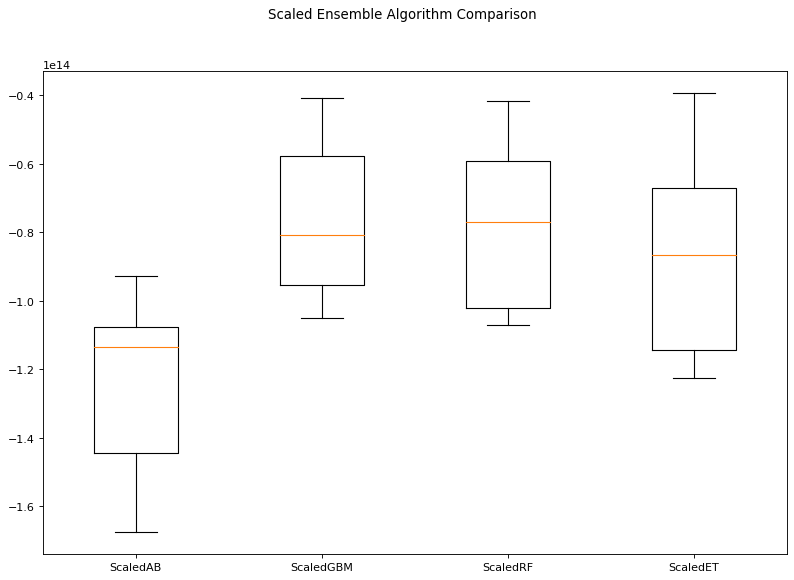

In [28]:
# Compare Algorithms
fig = pyplot.figure(figsize=(12, 8), dpi=80)
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [29]:
# Tune scaled GBM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=np.array([50,100,150,200,250,300,350,400]))
model = RandomForestRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

In [30]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -77404218092054.812500 using {'n_estimators': 350}
-79066370612845.312500 (22556500328292.160156) with: {'n_estimators': 50}
-77445153249193.875000 (22050370456292.097656) with: {'n_estimators': 100}
-77630676878580.718750 (22009892016456.406250) with: {'n_estimators': 150}
-77950554668651.500000 (22357856360269.160156) with: {'n_estimators': 200}
-77850078601101.828125 (22161878968735.468750) with: {'n_estimators': 250}
-77617128617304.234375 (22226530090469.410156) with: {'n_estimators': 300}
-77404218092054.812500 (22417419396995.367188) with: {'n_estimators': 350}
-77462405021955.671875 (22619591094155.867188) with: {'n_estimators': 400}


In [31]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = RandomForestRegressor(random_state=seed, n_estimators=400)
model.fit(rescaledX, Y_train)

RandomForestRegressor(n_estimators=400, random_state=7)

In [35]:
from sklearn.metrics import mean_squared_error
# transform the validation dataset
rescaledValidationX = scaler.transform(X_validation)
prediction = model.predict(rescaledValidationX)
print("MSE:", mean_squared_error(Y_validation, prediction))
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(Y_validation,prediction))
print("RMSE",np.sqrt(mean_squared_error(Y_validation,prediction)))
print("RMSLE",np.log(np.sqrt(mean_squared_error(Y_validation,prediction))))
from sklearn.metrics import r2_score
r2 = r2_score(Y_validation,prediction)
print("R2 score(COD)",r2)

MSE: 76219997640023.97
MAE 5373782.315288764
RMSE 8730406.499128433
RMSLE 15.982322490205787
R2 score(COD) 0.7505520747998442
